In [3]:
import pandas as pd

psi = pd.read_csv("psi_cov10_with_5mer.bed", sep="\t", low_memory=False)

bid = pd.read_csv("/prj/Qingyang/BID_seq_HEK293T.bed", sep="\t", low_memory=False)

In [4]:
merged = pd.merge(psi, bid, on=["chrom", "chromStart", "chromEnd", "strand"], how="inner", suffixes=("_psi", "_bid"))

merged["5mer_match"] = merged["5mer"] == merged["ref5mer"]

mismatch = merged[~merged["5mer_match"]]
mismatch.to_csv("5mer_mismatch.tsv", sep="\t", index=False)

matched = merged[merged["5mer_match"]].copy()
matched_output = matched[["chrom", "chromStart", "chromEnd", "strand", "5mer", "score_bid", "frequency"]]
matched_output.columns = ["chrom", "chromStart", "chromEnd", "strand", "5mer", "BID_score", "psi_frequency"]

matched_output.to_csv("matched_BIDpsi.tsv", sep="\t", index=False)

In [18]:
df = pd.read_csv("matched_BIDpsi.tsv", sep="\t", low_memory=False)

In [19]:
print(df.head())

  chrom  chromStart  chromEnd strand   5mer  BID_score  psi_frequency
0     1     1045780   1045781      +  GATGA        7.7           3.03
1     1     1051519   1051520      +  CTTTG       23.4          61.54
2     1     1082417   1082418      -  GTTCC       63.9          20.00
3     1     1254956   1254957      -  TGTAG       13.1          14.09
4     1     1336109   1336110      -  GGTGG        9.3           1.00


In [20]:
print(df.shape)

(499, 7)


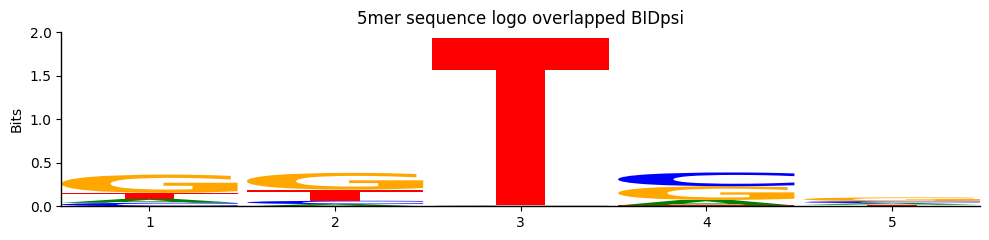

In [13]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

five_mers = df['5mer'].dropna().tolist()

info_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='information')

logo = logomaker.Logo(info_matrix, color_scheme='classic')

logo.ax.set_ylabel("Bits")
logo.ax.set_ylim([0, 2])

logo.ax.set_xticks([0, 1, 2, 3, 4])
logo.ax.set_xticklabels(['1', '2', '3', '4', '5'])
logo.style_spines(visible=False)
logo.style_spines(spines=["left", "bottom"], visible=True)

plt.title("5mer sequence logo overlapped BIDpsi")

plt.tight_layout()
plt.show()

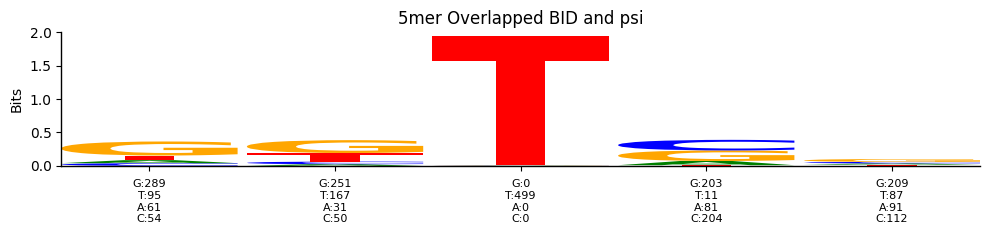

In [17]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
import numpy as np

five_mers = df['5mer'].dropna().tolist()

info_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='information')

logo = logomaker.Logo(info_matrix, color_scheme='classic')

logo.ax.set_ylabel("Bits")
logo.ax.set_ylim([0, 2])

logo.ax.set_xticks([0, 1, 2, 3, 4])
logo.ax.set_xticklabels(['1', '2', '3', '4', '5'])
logo.ax.set_xticklabels([])
logo.style_spines(visible=False)
logo.style_spines(spines=["left", "bottom"], visible=True)

counts_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='counts')

for pos in range(5):
    g_count = counts_matrix.loc[pos, 'G'] if 'G' in counts_matrix.columns else 0
    t_count = counts_matrix.loc[pos, 'T'] if 'T' in counts_matrix.columns else 0
    a_count = counts_matrix.loc[pos, 'A'] if 'A' in counts_matrix.columns else 0
    c_count = counts_matrix.loc[pos, 'C'] if 'C' in counts_matrix.columns else 0
    text = f"G:{g_count}\nT:{t_count}\nA:{a_count}\nC:{c_count}"
    logo.ax.text(pos, -0.2, text, ha='center', va='top', fontsize=8, transform=logo.ax.transData)

plt.title("5mer Overlapped BID and psi")

plt.tight_layout()
plt.show()

In [21]:
motif_counts = df['5mer'].value_counts()

print("Top 10 high frequencies motif:")
print(motif_counts.head(10))

Top 10 high frequencies motif:
5mer
GGTGG    61
TGTAG    39
GTTCC    33
GTTCA    32
GTTCT    27
TGTGG    22
AGTGG    18
GGTCC    16
GTTCG    14
GGTGC    10
Name: count, dtype: int64


/tmp/ipykernel_630281/2013468726.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_motifs.index, y=top_motifs.values, palette='Set2')


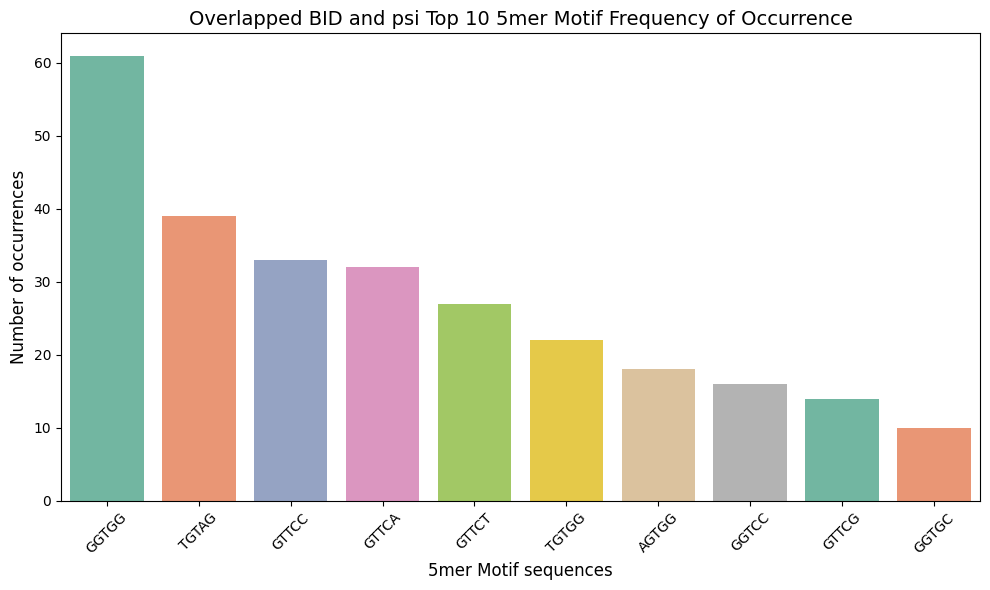

In [23]:
import seaborn as sns
top_motifs = motif_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_motifs.index, y=top_motifs.values, palette='Set2')

plt.xlabel('5mer Motif sequences', fontsize=12)
plt.ylabel('Number of occurrences', fontsize=12)
plt.title('Overlapped BID and psi Top 10 5mer Motif Frequency of Occurrence', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()